# Titatic Exploratory Analysis 

The purpose of this notebook is to perform exploratory data analysis on the Kaggle Titanic competition. 

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
# %pylab inline

pd.set_option('display.max_columns', 100)

In [55]:
# Import data 
df_train = pd.read_csv('./train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# size
df_train.shape

(891, 12)

## Variable Discussion 

Based on the descriptions of the variables and competition description, let's set some expectations of trends we expect to see. 

- **PassengerId**: No impact on survival.
- **Pclass**: 1 is Upper Class and 3 is Lower Class. Medium impact on survival with Upper Class having a higher survival rate. 
- **Sex**: Low-medium impact on survival with females having a higher survival rate. 
- **Age**: High impact on survival with children and elderly having a higher survival rate. 
- **SibSp**: Indicates # of siblings / spouses aboard the titatic. Unsure of impact - need to dig into data. 
- **Parch**: Indicates # of children / parents aboard the titatic. Unsure of impact - need to dig into data. 
- **Ticket**: Negligible impact on survival as expecting all unique values. 
- **Fare**: Expected to be correlated to Pclass with medium impact on survival. 
- **Cabin**: Low impact expected as Lower Class passengers do not have a cabin - thus lots of missing data expected. 
- **Embarked**: Unsure of impact - need to dig into data. 

**Main Variables of Interest**: 
- Medium-High Impact: `Age`, `Pclass`, `Fare`, `Sex` 
- Unsure of Impact: `SibSp`, `Parch`, `Embarked` 

## Bivariate Variable Relationships 

Let's explore the relationship between `Survived` and other variables of interest. To avoid repetitive work, we need to identify predictors that are correlated with each other using a correlation matrix. 

<AxesSubplot:>

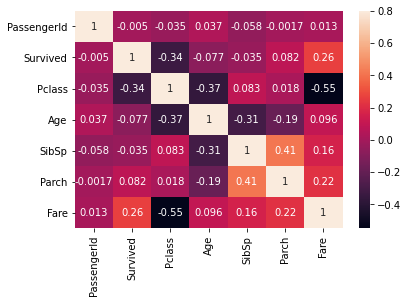

In [57]:
corr_mat = df_train.corr()
sns.heatmap(corr_mat, annot=True, vmax=0.8)

**Strong Predictors**: 
- As expected `Pclass` has a moderate correlation with `Survived` where Upper Class passengers have a higher survival rate. 

**Multicollinearity Variables**
- As expected, `Pclass` and `Fare` are moderately inversely correlated. Hence, depending on the machine learning algorithm chosen, one of these variables will be dropped from the analysis. 
- `Parch` and `SibSp` are positively correlated which makes sense given the close definition of the two variables. A new feature can possibly be engineered from the information represented in both the variables separately. 

### Numerical Variable Relationships

Numerical variables to explore: `Age`, `Fare` 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


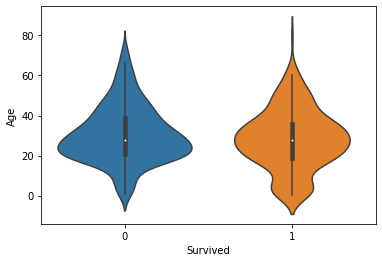

In [58]:
sns.violinplot(x='Survived', y='Age', data=df_train)
df_train.groupby('Survived').Age.describe()
# sns.swarmplot(x='Survived', y='Age', data=df_train, s=4)

Unlike expectations, no trend is observed between higher ages and survival. A minor trend is seen for children with a higher proportion of them surviving compared to all other ages. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


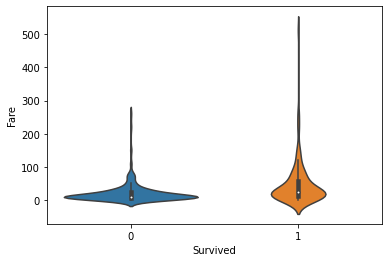

In [59]:
sns.violinplot(x='Survived', y='Fare', data=df_train)
df_train.groupby('Survived').Fare.describe()

The violin plot and summary statistics both show a trend where the passengers with higher fares had greater chance of survival. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


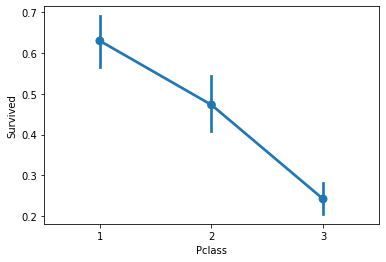

In [60]:
# sns.stripplot(x='Survived', y='Pclass', data=df_train)   #-not good
# sns.swarmplot(x='Survived', y='Pclass', data=df_train, s=4)   # doesn't work
# sns.violinplot(x='Survived', y='Pclass', data=df_train)    # seems best so far
sns.pointplot(x='Pclass', y='Survived', data=df_train)
df_train.groupby('Survived').Pclass.describe()
# fig.set(ylim=(-50, 300))
# fig.show()
# sns.barplot(x='Survived', y='Pclass', data=df_train)    #-meh 
# sns.boxplot(x='Survived', y='Pclass', data=df_train)   # - bad

### Categorical Variable Relationships

Categorical variables to explore: `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` 

Even though we have already established that `Pclass` and `Fare` are correlated and only one of the two will be used in the final analysis, it is worth exploring `Pclass` to judge which of the two variables provides better information to our final machine learning model. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


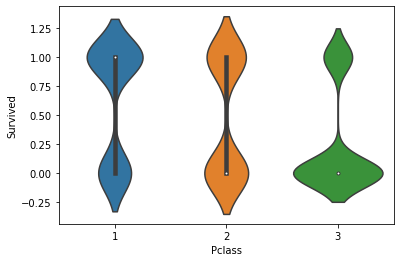

In [61]:
# sns.pointplot(x='Pclass', y='Survived', data=df_train)
sns.violinplot(x='Pclass', y='Survived', data=df_train)
df_train.groupby('Survived').Pclass.describe()

,count,unique,top,freq
Survived,,,,
0,549,2,male,468
1,342,2,female,233


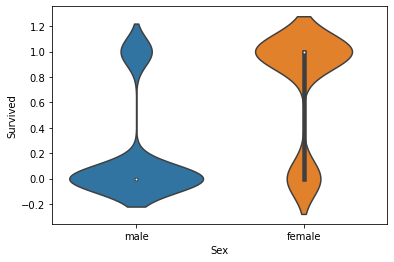

In [62]:
# sns.pointplot(x='Sex', y='Survived', data=df_train)
sns.violinplot(x='Sex', y='Survived', data=df_train)
df_train.groupby('Survived').Sex.describe()

As expected, females have a much higher chance of survival versus males. 

,count,unique,top,freq
Survived,,,,
0,549,3,S,427
1,340,3,S,217


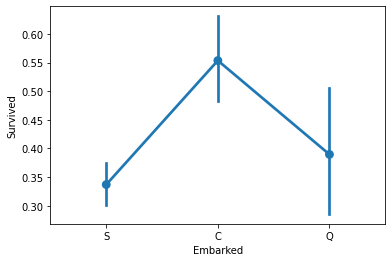

In [63]:
sns.pointplot(x='Embarked', y='Survived', data=df_train)
# sns.violinplot(x='Embarked', y='Survived', data=df_train)
df_train.groupby('Survived').Embarked.describe()

`Embarked` has a low-medium impact on survival with `C` for Cherbourg having a greater survival rate. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


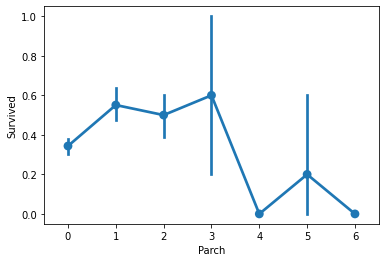

In [64]:
sns.pointplot(x='Parch', y='Survived', data=df_train)
# sns.violinplot(x='Parch', y='Survived', data=df_train)
df_train.groupby('Survived').Parch.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.553734,1.288399,0.0,0.0,0.0,1.0,8.0
1,342.0,0.473684,0.708688,0.0,0.0,0.0,1.0,4.0


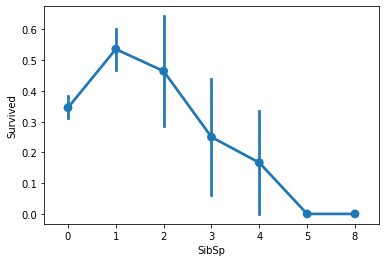

In [65]:
sns.pointplot(x='SibSp', y='Survived', data=df_train)
df_train.groupby('Survived').SibSp.describe()

`SibSp` and `Parch` were also identified to be correlated to each other. To better use the information within the two variables and avoid the correlation, a new variable `family_size` can be engineered. 

`family_size` = `SibSp` + `Parch` which is the number of direct family members the specific passenger has on board. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.883424,1.830669,0.0,0.0,0.0,1.0,10.0
1,342.0,0.938596,1.186076,0.0,0.0,1.0,2.0,6.0


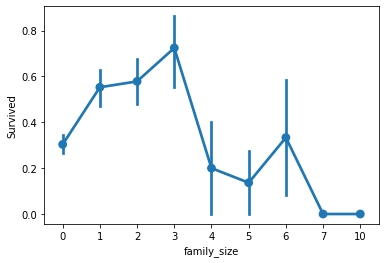

In [66]:
df_train['family_size'] = df_train.SibSp + df_train.Parch

sns.pointplot(x='family_size', y='Survived', data=df_train)
df_train.groupby('Survived').family_size.describe()

It seems that the chance of survival increases if you're part of a family, maxing out at a `family_size` of 3 (actual family size is 4 including the passenger itself) and decreasing for bigger families. 

### In Summary

- `Fare` and `Pclass` both are correlated to each other and have a **medium** impact on survival rate where Upper Class passengers have a higher survival rate. `Fare` will be used in analysis going forward to avoid multicollinearity. 
- `Age` has **low** impact on survival for almost all ages except children having a marginally higher survival. 
- `Sex` has **high** impact on survival.
- `Embarked` has **low-medium** impact on survival with specific locations havign higher survival rate. 
- `SibSp` and `Parch` by themselves don't affect surival as much. `family_size` which is a sum of the two variables has a higher impact on survival compared to the individual variables. 

In [67]:
# Plot to dig further into splitters driving trends 
# sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df_train, palette={'male': 'g', 'female':'m'})

## Missing Data 

Let's explore the quality of the data and clean variables that have missing data by either imputing or dropping from analysis. 

In [68]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Cleaning up missing data for this dataset should be straightforward as `Cabin` and `Age` are variables that we did not plan to use in the final model. `Cabin` can be ignored instantly due to the high amount of missing data. We will ignore `Age` for now and look into data imputation methods at a later stage if needed. 

For the two passengers missing `Embarked` data, given the low amount of missing sample, we can drop the rows missing `Embarked` variable. 

In [70]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 2]).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train.Embarked.isnull()].index)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,0


In [71]:
# Check for no missing values
df_train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
family_size    0
dtype: int64

## Outliers 

It is crucial to ensure that outliers in the dataset are handled properly given the high impact they can have on the final prediction. We need to spot outliers in numerical variables (`Fare`) and decide whether it's a data collection/imputation mistake and remove them or it's a genuine data point that should be kept to feed in the final model. 

In [83]:
#standardizing data
fare_scaled = StandardScaler().fit_transform(df_train['Fare'].to_numpy().reshape(-1, 1))
low_range = fare_scaled[fare_scaled[:,0].argsort()][:10]
high_range = fare_scaled[fare_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]
 [-0.64620445]]

outer range (high) of the distribution:
[[4.33714701]
 [4.63620753]
 [4.63620753]
 [4.6487907 ]
 [4.6487907 ]
 [4.6487907 ]
 [4.6487907 ]
 [9.66855078]
 [9.66855078]
 [9.66855078]]


**Standardized Data Takeaways**:
- No significant outliers stand out on the lower range of the distribution
- Three data point (9.something) stand out on the higher end of the distribution which need to be noted in later analysis. 

## Variables Distribution

The final section in the exploratory analysis is to explore the distributions of variables to verify statisticals properties including: 
- **Normality**: This means that the data should look like a normal distribution which is an important property for many statistical techniques that might be used later in the modeling stage. 
- **Homoscedasticity** - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

/Users/Devansh/.pyenv/versions/3.9.4/envs/venv-sfds/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


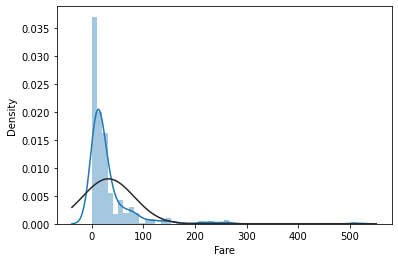

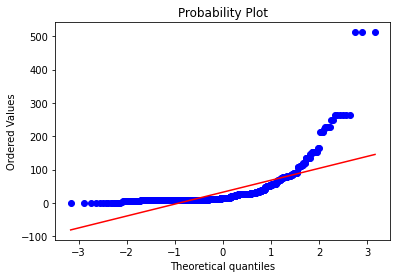

In [95]:
#histogram and normal probability plot
sns.distplot(df_train['Fare'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['Fare'], plot=plt)

`Fare` is not normal as it shows 'peakedness', positive skewness and does not follow the diagonal line. Log transformations are one way to correct for positive skewness. However, we need to ensure that any samples with `Fare` equal to 0 or lower are removed due to the nature of log transformation. 

In [ ]:
df_train[df_train['Fare'] == 0]

The number of samples with $0 `Fare` is relatively low and shows data quality issues given that many of the passengers belonged to Pclass 1 or 2 despite paying no fare. 

In [105]:
# Drop any samples with 0 fare
df_train = df_train.drop(df_train.loc[df_train.Fare == 0].index)
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,family_size


/Users/Devansh/.pyenv/versions/3.9.4/envs/venv-sfds/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


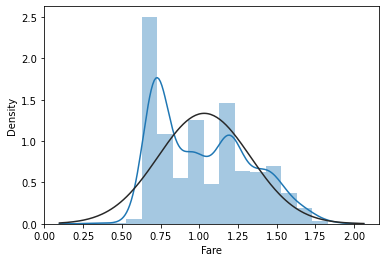

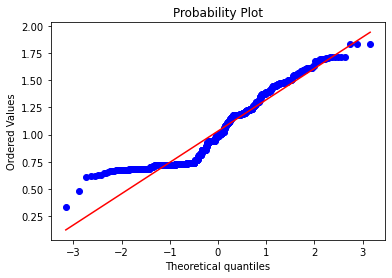

In [108]:
df_train['Fare'] = np.log(df_train['Fare'])

sns.distplot(df_train['Fare'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['Fare'], plot=plt)

## Categorical Variables Conversion

One of the last steps prior to using our data in different models is converting the categorical variables to a numerical format that can be accepted by different statistical models we wish to use. 